In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
data = pd.read_excel("C:/Users/mandar/Downloads/ANZ synthesised transaction dataset.xlsx")

In [3]:
data.describe(include="all")

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,7717.000000,885.0,12043,12043,12043,12043,7717,883.0,12043,...,12043.000000,7717,7717,12043,12043.000000,12043,12043,12043,7717,12043
unique,2,NaN,3.0,100,1,100,6,5725,NaN,80,...,NaN,1609,8,9442,NaN,12043,1,100,2703,2
top,authorized,NaN,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,NaN,Michael,...,NaN,Melbourne,NSW,2018-09-03T11:00:00.000+0000,NaN,f4c11223578147be93d769581a76769e,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,NaN,883.0,578,12043,578,3934,14,NaN,746,...,NaN,255,2169,10,NaN,1,12043,578,145,11160
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.802644,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,30.582330,NaN,NaN,NaN,187.933588,NaN,NaN,NaN,NaN,NaN
std,NaN,0.398029,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,10.046343,NaN,NaN,NaN,592.599934,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,18.000000,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,22.000000,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [5]:
data_salaries = data[data["txn_description"] == "PAY/SALARY"].groupby("account").mean()

In [6]:
print("Mean Values Indexed by account")
data_salaries.head()

Mean Values Indexed by account


,card_present_flag,merchant_code,balance,age,amount
account,,,,,
ACC-1037050564,NaN,0.0,3959.400000,40,892.09
ACC-1056639002,NaN,0.0,49718.081667,22,3195.01
ACC-1199531521,NaN,0.0,12414.007143,52,3785.78
ACC-1217063613,NaN,0.0,6884.815000,27,4863.62
ACC-1222300524,NaN,0.0,1755.892308,38,1002.13


In [7]:
salaries = []

for account in data["account"]:
    salaries.append(int(data_salaries.loc[account]["amount"]))

data["pay"] = salaries
data_acc = data.groupby("account").mean()

print("Added Column of Pay Indexed by Account")

Added Column of Pay Indexed by Account


In [8]:
data_salaries_sum = data[data['txn_description'] == "PAY/SALARY"].groupby("account").sum()
print("Sum Values Indexed by Account")
data_salaries_sum.head()

Sum Values Indexed by Account


,card_present_flag,merchant_code,balance,age,amount,pay
account,,,,,,
ACC-1037050564,0.0,0.0,51472.20,520,11597.17,11596
ACC-1056639002,0.0,0.0,298308.49,132,19170.06,19170
ACC-1199531521,0.0,0.0,86898.05,364,26500.46,26495
ACC-1217063613,0.0,0.0,13769.63,54,9727.24,9726
ACC-1222300524,0.0,0.0,22826.60,494,13027.69,13026


In [9]:
pay_count =[]

for account in data["account"]:
    pay_count.append(int(int(data_salaries_sum.loc[account]["amount"]) / int(data_salaries.loc[account]["amount"])))
                     
data["pay_count"] = pay_count
data_acc = data.groupby("account").mean()
                     
print("Added Column of pay and pay_count Indexed by account")
            
data_acc.head()                     

Added Column of pay and pay_count Indexed by account


,card_present_flag,merchant_code,balance,age,amount,pay,pay_count
account,,,,,,,
ACC-1037050564,0.827273,0.0,3331.424479,40,74.465019,892,13
ACC-1056639002,0.775862,0.0,46338.733837,22,265.134767,3195,6
ACC-1199531521,0.744186,0.0,10162.788961,52,418.742468,3785,7
ACC-1217063613,0.785714,0.0,4513.148800,27,426.108800,4863,2
ACC-1222300524,0.818841,0.0,1191.291419,38,78.206106,1002,13


In [10]:
data_acc.max()

card_present_flag         1.000000
merchant_code             0.000000
balance              263753.766119
age                      78.000000
amount                  693.632903
pay                    8835.000000
pay_count                14.000000
dtype: float64

Text(0, 0.5, 'Number of Customers')

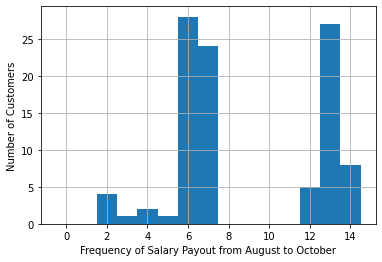

In [11]:
data_acc.pay_count.hist(bins=15, range=(0,15), align="left")
plt.xlabel("Frequency of Salary Payout from August to October")
plt.ylabel("Number of Customers")

Text(0, 0.5, 'Number of Customers')

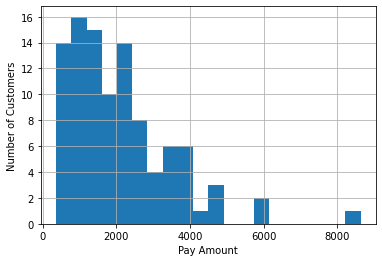

In [12]:
data_acc.pay.hist(bins=20, align='left')
plt.xlabel("Pay Amount")
plt.ylabel("Number of Customers")

In [13]:
data_acc["annual_salary"] = 0
for i in range(0,len(data_acc.pay_count)):
    #weekly pay
    if data_acc["pay_count"][i] >=12:
        data_acc["annual_salary"][i] = data_acc["pay"][i] / 7 *365.25 
    #monthly pay
    elif data_acc["pay_count"][i] <=5:
        data_acc["annual_salary"][i] = data_acc["pay"][i] * 12 
    #fortnightly pay
    else:
        data_acc["annual_salary"][i] = data_acc["pay"][i] / 14 *365.25
        
data_acc.head()

C:\Users\mandar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\mandar\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\mandar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,card_present_flag,merchant_code,balance,age,amount,pay,pay_count,annual_salary
account,,,,,,,,
ACC-1037050564,0.827273,0.0,3331.424479,40,74.465019,892,13,46543
ACC-1056639002,0.775862,0.0,46338.733837,22,265.134767,3195,6,83355
ACC-1199531521,0.744186,0.0,10162.788961,52,418.742468,3785,7,98747
ACC-1217063613,0.785714,0.0,4513.148800,27,426.108800,4863,2,58356
ACC-1222300524,0.818841,0.0,1191.291419,38,78.206106,1002,13,52282


In [14]:
# obtain other debit transaction and store in previous data frame
for txn in data.txn_description.unique():
    if txn != 'PAY/SALARY':
        data_T = data.loc[data['txn_description'] == txn]
        data_acc[txn] = data_T.amount.groupby(data_T.account.values).sum()
data_acc.fillna(0, inplace=True)

# feature engineering of debit attribute
data_acc['spendings'] = data_acc['POS']+ data_acc['SALES-POS']+data_acc['PAYMENT']+data_acc['INTER BANK']+data_acc['PHONE BANK']
data_acc['age'] = data.age.groupby(data.account.values).mean()

data_acc.head()

,card_present_flag,merchant_code,balance,age,amount,pay,pay_count,annual_salary,POS,SALES-POS,PAYMENT,INTER BANK,PHONE BANK,spendings
account,,,,,,,,,,,,,,
ACC-1037050564,0.827273,0.0,3331.424479,40,74.465019,892,13,46543,3399.41,3445.86,844.0,0.0,0.0,7689.27
ACC-1056639002,0.775862,0.0,46338.733837,22,265.134767,3195,6,83355,675.54,1299.99,747.0,909.0,0.0,3631.53
ACC-1199531521,0.744186,0.0,10162.788961,52,418.742468,3785,7,98747,1085.93,598.78,2883.0,1175.0,0.0,5742.71
ACC-1217063613,0.785714,0.0,4513.148800,27,426.108800,4863,2,58356,220.63,91.85,338.0,275.0,0.0,925.48
ACC-1222300524,0.818841,0.0,1191.291419,38,78.206106,1002,13,52282,6636.13,3049.63,983.0,0.0,0.0,10668.76


In [15]:
data_intermediate = data[['account','gender']]
indexNames = data_intermediate[data_intermediate['account'] == 'ACC-2901672282'].index
data_intermediate.drop(indexNames , inplace=True)
data_intermediate.head()

C:\Users\mandar\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,account,gender
0,ACC-1598451071,F
1,ACC-1598451071,F
2,ACC-1222300524,M
3,ACC-1037050564,F
4,ACC-1598451071,F


In [16]:
data_corr = data_intermediate.join(data_acc, on='account')
print(data_corr.shape)
data_corr.head()

(11920, 16)


,account,gender,card_present_flag,merchant_code,balance,age,amount,pay,pay_count,annual_salary,POS,SALES-POS,PAYMENT,INTER BANK,PHONE BANK,spendings
0,ACC-1598451071,F,0.790960,0.0,1735.120675,26,45.348772,1013,14,52856,4830.97,4988.24,1665.0,536.0,0.0,12020.21
1,ACC-1598451071,F,0.790960,0.0,1735.120675,26,45.348772,1013,14,52856,4830.97,4988.24,1665.0,536.0,0.0,12020.21
2,ACC-1222300524,M,0.818841,0.0,1191.291419,38,78.206106,1002,13,52282,6636.13,3049.63,983.0,0.0,0.0,10668.76
3,ACC-1037050564,F,0.827273,0.0,3331.424479,40,74.465019,892,13,46543,3399.41,3445.86,844.0,0.0,0.0,7689.27
4,ACC-1598451071,F,0.790960,0.0,1735.120675,26,45.348772,1013,14,52856,4830.97,4988.24,1665.0,536.0,0.0,12020.21


In [17]:
data_corr = data_corr.drop(columns=['card_present_flag','merchant_code','account', 'POS', 'pay_count','PAYMENT', 'SALES-POS', 'PHONE BANK', 'INTER BANK', 'pay'])
data_corr.head()

,gender,balance,age,amount,annual_salary,spendings
0,F,1735.120675,26,45.348772,52856,12020.21
1,F,1735.120675,26,45.348772,52856,12020.21
2,M,1191.291419,38,78.206106,52282,10668.76
3,F,3331.424479,40,74.465019,46543,7689.27
4,F,1735.120675,26,45.348772,52856,12020.21


In [18]:
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11920 entries, 0 to 12042
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         11920 non-null  object 
 1   balance        11920 non-null  float64
 2   age            11920 non-null  int64  
 3   amount         11920 non-null  float64
 4   annual_salary  11920 non-null  int64  
 5   spendings      11920 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 651.9+ KB


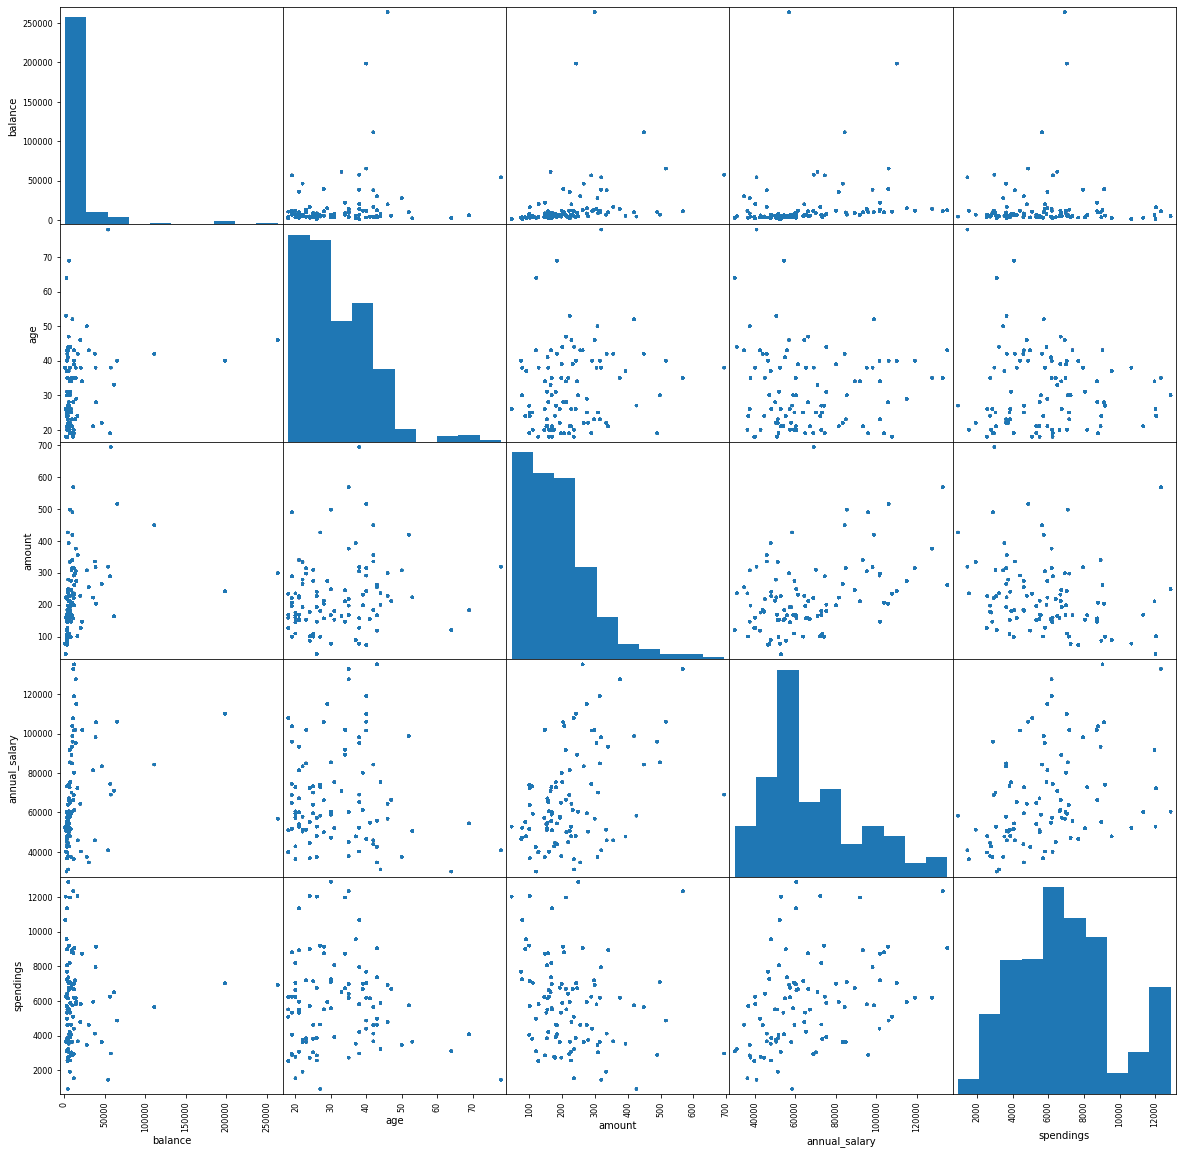

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_corr, figsize=(20,20))
plt.show()

In [20]:
y = data_corr['annual_salary']
x = data_corr.drop(columns=['annual_salary'], axis = 1)
# Create correlation matrix
corr_matrix = data_corr.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

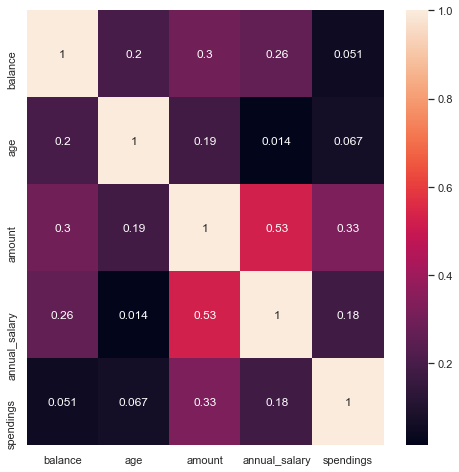

In [55]:
fig, ax = plt.subplots(figsize=(8,8))  
sns.heatmap(corr_matrix, annot = True, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, ax = ax)

Text(0, 0.5, 'Annual Salary')

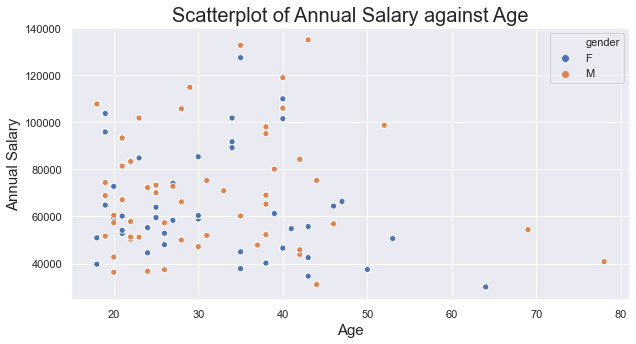

In [22]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
age_salary_graph = sns.scatterplot(x="age", y="annual_salary", hue = 'gender', data=data_corr)
age_salary_graph.axes.set_title("Scatterplot of Annual Salary against Age",fontsize=20)
age_salary_graph.set_xlabel("Age", fontsize=15)
age_salary_graph.set_ylabel("Annual Salary", fontsize=15)

In [23]:
data_corr.head()

,gender,balance,age,amount,annual_salary,spendings
0,F,1735.120675,26,45.348772,52856,12020.21
1,F,1735.120675,26,45.348772,52856,12020.21
2,M,1191.291419,38,78.206106,52282,10668.76
3,F,3331.424479,40,74.465019,46543,7689.27
4,F,1735.120675,26,45.348772,52856,12020.21


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [25]:
annual_salary_series = data_corr.get('annual_salary')
annual_salary_series = np.array(annual_salary_series).reshape(-1,1)
scaled_annual_salary=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(annual_salary_series)
for i in annual_salary_series:
    scaled_annual_salary.append(scaler.transform([[i[0]]])[0][0])
# print(scaled_annual_salary)
scaled_annual_salary=np.array(scaled_annual_salary).reshape(-1,1)
data_corr['scaled_annual_salary'] = scaled_annual_salary

balance_series = data_corr.get('balance')
balance_series = np.array(balance_series).reshape(-1,1)
scaled_balance=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(balance_series)
for i in balance_series:
    scaled_balance.append(scaler.transform([[i[0]]])[0][0])
# print(scaled_annual_balance)
scaled_balance=np.array(scaled_balance).reshape(-1,1)
data_corr['scaled_balance'] = scaled_balance 

spending_series = data_corr.get('spendings')
spending_series = np.array(spending_series).reshape(-1,1)
scaled_spending=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(spending_series)
for i in spending_series:
    scaled_spending.append(scaler.transform([[i[0]]])[0][0])
#print(scaled_annual_spending)
scaled_spending=np.array(scaled_spending).reshape(-1,1)
data_corr['scaled_spending'] = scaled_spending 

age_series = data_corr.get('age')
age_series = np.array(age_series).reshape(-1,1)
scaled_age=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(age_series)
for i in age_series:
    scaled_age.append(scaler.transform([[i[0]]])[0][0])
#print(scaled_annual_spending)
scaled_age=np.array(scaled_age).reshape(-1,1)
data_corr['scaled_age'] = scaled_age

amount_series = data_corr.get('amount')
amount_series = np.array(amount_series).reshape(-1,1)
scaled_amount=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(amount_series)
for i in amount_series:
    scaled_amount.append(scaler.transform([[i[0]]])[0][0])
#print(scaled_annual_spending)
scaled_amount=np.array(scaled_amount).reshape(-1,1)
data_corr['scaled_amount'] = scaled_amount

In [26]:
data_corr.head()

,gender,balance,age,amount,annual_salary,spendings,scaled_annual_salary,scaled_balance,scaled_spending,scaled_age,scaled_amount
0,F,1735.120675,26,45.348772,52856,12020.21,21.719500,0.207124,92.919130,13.333333,0.000000
1,F,1735.120675,26,45.348772,52856,12020.21,21.719500,0.207124,92.919130,13.333333,0.000000
2,M,1191.291419,38,78.206106,52282,10668.76,21.172750,0.000000,81.600643,33.333333,5.068354
3,F,3331.424479,40,74.465019,46543,7689.27,15.706203,0.815095,56.647209,36.666667,4.491279
4,F,1735.120675,26,45.348772,52856,12020.21,21.719500,0.207124,92.919130,13.333333,0.000000


In [27]:
# Splitting data into X and y
X = data_corr.drop(columns=['scaled_annual_salary', 'scaled_balance', 'scaled_spending', 'scaled_age', 'scaled_amount', 'annual_salary'], axis=1)
y = data_corr['annual_salary']

In [28]:
X.shape, y.shape

((11920, 5), (11920,))

In [29]:
# Converting categorical into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['gender' , 'age']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                remainder='passthrough')

from sklearn.model_selection import train_test_split
X = transformer.fit_transform(X)
X_lin_train , X_lin_test , y_lin_train , y_lin_test = X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [30]:
# Machine Learning Models

In [31]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Setting up random seed
np.random.seed(42)
# Instantiate the model
model_lin = LinearRegression()
# Fit the model
model_lin.fit(X_train , y_train)
# Making predictions
y_lin_preds = model_lin.predict(X_test)
# Model Score 
model_lin.score(X_test , y_test)

r2_lin = r2_score(y_test , y_lin_preds)
#  Mean absoulte error on linear regression
mae_lin = mean_absolute_error(y_test , y_lin_preds)
# Mean Squared error on linear 
mse_lin = mean_squared_error(y_test , y_lin_preds)
#Root Mean Squared error on linear
rmse_lin = mean_squared_error(y_test , y_lin_preds, squared=False)

print("r2 score: ",r2_lin)
print("Mean absoulte error: ", mae_lin)
print("Mean Squared error: ", mse_lin)
print("Root Mean Squared Error:", rmse_lin)

r2 score:  0.6749903717579834
Mean absoulte error:  10091.66622969921
Mean Squared error:  172106161.15284452
Root Mean Squared Error: 13118.923780281846


In [32]:
data_abs = pd.DataFrame(data = {'Actual values':y_test ,
                             'Predicted values':y_lin_preds})
data_abs['Differences'] = data_abs['Predicted values'] - data_abs['Actual values']

data_abs.head()

,Actual values,Predicted values,Differences
3795,60161,73989.218107,13828.218107
10219,56848,84654.382854,27806.382854
732,60214,71180.753696,10966.753696
8123,65223,49331.650174,-15891.349826
9749,105765,85249.491730,-20515.508270


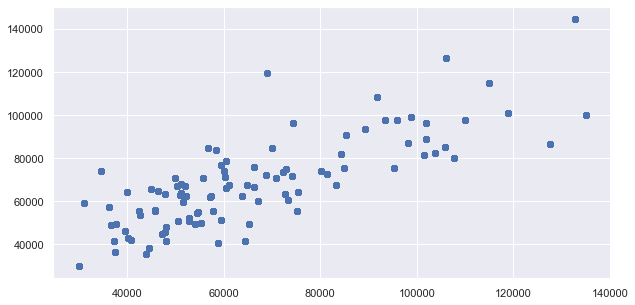

In [33]:
# Visualizing with scatter plot how well our model is doing
plt.scatter(y_test , y_lin_preds)

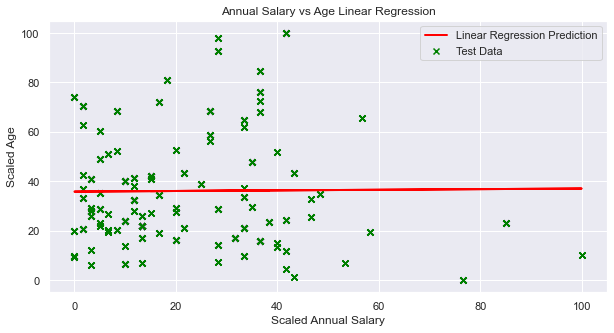

Mean Absolute Error: 17.8
Mean Squared Error: 499.83
Root Mean Squared Error: 22.36


In [34]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X = np.array(data_corr.get('scaled_age')).reshape(-1,1)
y = np.array(data_corr.get('scaled_annual_salary')).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

fig, ax = plt.subplots()
lr = LinearRegression().fit(X_train, y_train)
y_predict=predict=lr.predict(X_test)
ax.set_xlabel("Scaled Annual Salary")
ax.set_ylabel("Scaled Age")
ax.set_title('Annual Salary vs Age Linear Regression')
ax.scatter(X_test, y_test,  color='green', marker='x', label='Test Data')
ax.plot(X_test, y_predict, color='red', linewidth=2, label='Linear Regression Prediction')
ax.legend(loc='upper right')
plt.show()

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_predict),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_predict),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_predict)),2))

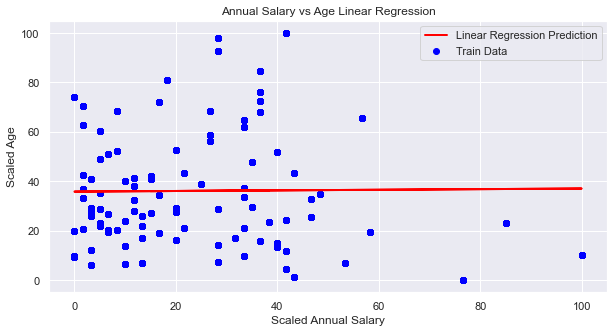

In [35]:
fig, ax = plt.subplots()
lr = LinearRegression().fit(X_train, y_train)
y_predict=predict=lr.predict(X_test)
ax.set_xlabel("Scaled Annual Salary")
ax.set_ylabel("Scaled Age")
ax.set_title('Annual Salary vs Age Linear Regression')
ax.scatter(X_train, y_train,  color='blue', marker='o', label='Train Data')
ax.plot(X_test, y_predict, color='red', linewidth=2, label='Linear Regression Prediction')
ax.legend(loc='upper right')
plt.show()

In [36]:
def calculate_annual_salary_percentile(annual_salary, annual_salary_list):
    annual_salary_percentiles=np.percentile(annual_salary_list,[10,20,30,40,50,60,70,80,90,100])
    percentile=0
    for i,val  in enumerate(annual_salary_percentiles):
        if annual_salary>val:
            percentile=i
    annual_salary_percentiles[percentile]
    percentile=(percentile+1)*10
    return percentile

def calculate_annual_balance_percentile(annual_balance, annual_balance_list):
    annual_balance_percentiles=np.percentile(annual_balance_list,[10,20,30,40,50,60,70,80,90,100])
    percentile=0
    for i,val  in enumerate(annual_balance_percentiles):
        if annual_balance>val:
            percentile=i
    annual_balance_percentiles[percentile]
    percentile=(percentile+1)*10
    return percentile

def calculate_annual_spending_percentile(annual_spending, annual_spending_list):
    annual_spending_percentiles=np.percentile(annual_spending_list,[10,20,30,40,50,60,70,80,90,100])
    percentile=0
    for i,val  in enumerate(annual_spending_percentiles):
        if annual_spending>val:
            percentile=i
    annual_spending_percentiles[percentile]
    percentile=(percentile+1)*10
    return percentile

In [37]:
#These percentiles show what kind of financial decision should the customer make
    
   # >80 and <100 high
    # >60 and <79 med
    # >30 and <59 low
    # >0 and <29 extra low
    
#Eg: if annual_spending_percentile = 'high' but annual_salary_percentile = 'low' then he/she should reduce spending

In [38]:
data_corr['annual_salary_percentile']=data_corr['scaled_annual_salary'].apply(calculate_annual_salary_percentile, args=(scaled_annual_salary,))
data_corr['annual_balance_percentile']=data_corr['scaled_balance'].apply(calculate_annual_balance_percentile, args=(scaled_balance,))
data_corr['annual_spending_percentile']=data_corr['scaled_spending'].apply(calculate_annual_spending_percentile, args=(scaled_spending,))

In [39]:
data_corr.head()

,gender,balance,age,amount,annual_salary,spendings,scaled_annual_salary,scaled_balance,scaled_spending,scaled_age,scaled_amount,annual_salary_percentile,annual_balance_percentile,annual_spending_percentile
0,F,1735.120675,26,45.348772,52856,12020.21,21.719500,0.207124,92.919130,13.333333,0.000000,20,10,90
1,F,1735.120675,26,45.348772,52856,12020.21,21.719500,0.207124,92.919130,13.333333,0.000000,20,10,90
2,M,1191.291419,38,78.206106,52282,10668.76,21.172750,0.000000,81.600643,33.333333,5.068354,20,10,80
3,F,3331.424479,40,74.465019,46543,7689.27,15.706203,0.815095,56.647209,36.666667,4.491279,10,10,60
4,F,1735.120675,26,45.348772,52856,12020.21,21.719500,0.207124,92.919130,13.333333,0.000000,20,10,90


In [40]:
# Decision Tree Classifier
feature_cols=['annual_balance_percentile', 'annual_spending_percentile']
X = data_corr[feature_cols] # Features
y = data_corr['annual_salary_percentile'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [41]:
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)

#check which depth is better for decision tree
for max_depth in range(1, 20):
    model_reg = DecisionTreeRegressor(max_depth=max_depth)
    model_reg.fit(X_train , y_train)
    scores = model_reg.score(X_test , y_test)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))

Max depth: 1, Accuracy: 0.43 (+/- 0.00)
Max depth: 2, Accuracy: 0.57 (+/- 0.00)
Max depth: 3, Accuracy: 0.63 (+/- 0.00)
Max depth: 4, Accuracy: 0.65 (+/- 0.00)
Max depth: 5, Accuracy: 0.68 (+/- 0.00)
Max depth: 6, Accuracy: 0.70 (+/- 0.00)
Max depth: 7, Accuracy: 0.72 (+/- 0.00)
Max depth: 8, Accuracy: 0.74 (+/- 0.00)
Max depth: 9, Accuracy: 0.76 (+/- 0.00)
Max depth: 10, Accuracy: 0.76 (+/- 0.00)
Max depth: 11, Accuracy: 0.76 (+/- 0.00)
Max depth: 12, Accuracy: 0.76 (+/- 0.00)
Max depth: 13, Accuracy: 0.76 (+/- 0.00)
Max depth: 14, Accuracy: 0.76 (+/- 0.00)
Max depth: 15, Accuracy: 0.76 (+/- 0.00)
Max depth: 16, Accuracy: 0.76 (+/- 0.00)
Max depth: 17, Accuracy: 0.76 (+/- 0.00)
Max depth: 18, Accuracy: 0.76 (+/- 0.00)
Max depth: 19, Accuracy: 0.76 (+/- 0.00)


In [42]:
# Instantiate the model
model_reg = DecisionTreeRegressor(max_depth = 9)
model_reg.fit(X_train , y_train)
# Score of the model
model_reg.score(X_test , y_test)
# Make predictions 
y_preds = model_reg.predict(X_test)
# Checking the score 
model_reg.score(X_test , y_test)

0.7588109509796269

In [43]:
# r2 score evalutation on decision tree
r2_dec = r2_score(y_test , y_preds)
# Mean absoulte error on decision tree
mae_dec = mean_absolute_error(y_test , y_preds)
# Mean Squared Error on decision tree 
mse_dec = mean_squared_error(y_test , y_preds)

print("r2 score",r2_dec)
print("Mean absoulte error",mae_dec)
print("Mean Squared Error",mse_dec)

r2 score 0.7588109509796269
Mean absoulte error 8.154801417555058
Mean Squared Error 179.2840661101291


In [44]:
model_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [45]:
# Creating grid for Decision tree
dec_reg_grid = {'max_depth':[None,3,5,10],
          'min_samples_split':np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2) , 
           'min_samples_split':np.arange(2,10,1),
            'max_leaf_nodes':np.arange(2,20,2)}

In [46]:
# Tune Decision Tree Regressor
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV

np.random.seed(42)

# Setup random hyperparameter search for Decision Tree Regressor
rs_dec_reg = RandomizedSearchCV(DecisionTreeRegressor(),
                               param_distributions=dec_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_dec_reg.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_leaf_nodes': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   verbose=True)

In [47]:
rs_dec_reg.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 13,
 'max_leaf_nodes': 18,
 'max_depth': 10}

In [48]:
def evaluate_preds(y_true , y_preds):

#Performs evaluation comparison on y_true labels Vs y_pred labels on a regression model.

    r2score = r2_score(y_test , y_preds)
    mse = mean_squared_error(y_test , y_preds)
    mae= mean_absolute_error(y_test , y_preds)
    metric_dict = {'R2 Score': round(r2score,2),
                   'Mean Squared Error': round(mse,2),
                  'Mean Absolute Error': round(mae,2),
                  }
    print(f'R2 Score :{r2score*100:2f}%')
    print(f'Mean Squared Error :{mse:2f}')
    print(f'Mean Absolute Error :{mae:2f}')
    return metric_dict

In [49]:
# Evaluate RandomizedSearchCV model and predict
rs_y_preds = rs_dec_reg.predict(X_test)

# Evaluate the metrics 
rs_metrics = evaluate_preds(y_test , rs_y_preds)

R2 Score :69.904865%
Mean Squared Error :223.707425
Mean Absolute Error :11.068907


In [50]:
# Evaluating the model 
model_reg.score(X_test , y_test)

0.7588109509796269

In [51]:
data_dec = pd.DataFrame(data = {'Actual values':y_test ,
                             'Predicted values':y_preds})
data_dec['Differences'] = data_dec['Predicted values'] - data_dec['Actual values']

data_dec.head()

,Actual values,Predicted values,Differences
4199,30,30.000000,0.000000
8533,80,80.000000,0.000000
10372,50,35.660377,-14.339623
11185,10,41.854839,31.854839
8146,20,20.000000,0.000000


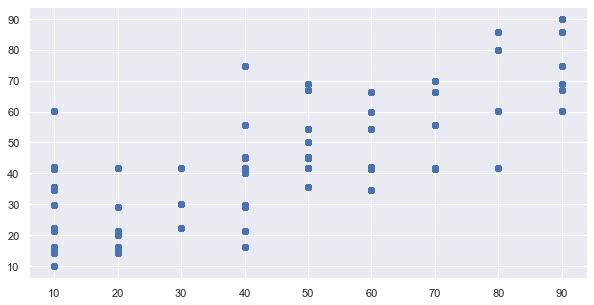

In [52]:
#Visualizing with scatter plot how well our model is doing
plt.scatter(y_test , y_preds)

In [53]:
# Metrics Comparison

print("Decision Tree Model:")
baseline_metrics_tree = evaluate_preds(y_test , y_preds)
rs_metrics

compare_metrics = pd.DataFrame({
    'baseline decision tree':baseline_metrics_tree,})

print("........................................")
print("Linear Regression Model:")
print("R2 score: ",r2_lin*100,"%")
print("Mean Squared Error: ",mse_lin)
print("Mean Absolute Error: ",mae_lin)

Decision Tree Model:
R2 Score :75.881095%
Mean Squared Error :179.284066
Mean Absolute Error :8.154801
........................................
Linear Regression Model:
R2 score:  67.49903717579834 %
Mean Squared Error:  172106161.15284452
Mean Absolute Error:  10091.66622969921
